Drug Use By Age
This directory contains data behind the story How Baby Boomers Get High. It covers 13 drugs across 17 age groups.

https://github.com/fivethirtyeight/data/blob/master/drug-use-by-age/drug-use-by-age.csv


Source: National Survey on Drug Use and Health from the Substance Abuse and Mental Health Data Archive.



In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [86]:
df = pd.read_csv("drug-use-by-age.csv")

In [87]:
df.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [88]:
df.shape

(17, 28)

In [89]:
df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [90]:
variables = df.shape[1]-1
datapoints =  variables * (df.shape[0]-1)
print ('Number of Datapoints: ', datapoints)
print ('Number of Variables: ', variables)

Number of Datapoints:  432
Number of Variables:  27


In [91]:
print ('Categorical Variables:\n',df.columns.values[0], '\n')

print ('Continuous Variables:')
collectPrintRets = [print (' ',e) for e in df.columns.values[1:28]]

Categorical Variables:
 age 

Continuous Variables:
  n
  alcohol-use
  alcohol-frequency
  marijuana-use
  marijuana-frequency
  cocaine-use
  cocaine-frequency
  crack-use
  crack-frequency
  heroin-use
  heroin-frequency
  hallucinogen-use
  hallucinogen-frequency
  inhalant-use
  inhalant-frequency
  pain-releiver-use
  pain-releiver-frequency
  oxycontin-use
  oxycontin-frequency
  tranquilizer-use
  tranquilizer-frequency
  stimulant-use
  stimulant-frequency
  meth-use
  meth-frequency
  sedative-use
  sedative-frequency


In [92]:
# Frequency associated with zero usage is uses a "-"


In [93]:
df_clean.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [95]:

## WHATS THE ISSUE WITH THIS COMPREHENSION??
##[df_freq[col] = df_freq[col].astype(float) for col in df_freq.columns if isinstance(df_freq[col][0], object)]

In [97]:
# Seperate Use from Frequency
selected_columns = [col for col in df_clean.columns if "-use" in col]

df_use = df[selected_columns]

selected_columns = [col for col in df_clean.columns if "-frequency" in col]

df_freq = df[selected_columns]

In [98]:
df_freq = df_freq.replace('-', 0)
df_use = df_use.replace('-', 0)

In [99]:
for col in df_freq.columns:
     if isinstance(df_freq[col][0], object):
            df_freq[col]=df_freq[col].astype(float)

for col in df_use.columns:
     if isinstance(df_use[col][0], object):
            df_freq[col]=df_use[col].astype(float)

In [117]:
def BoxHistOutliers(column, df_focus):
    
    colList = df_focus[column]
    
    # plots
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=column, data=df_focus)
    
    plt.subplot(1, 2, 2)
    g=sns.distplot(colList, kde=False, bins=20)
    
    # rotate label for large tick values on histagram x axis
    if (colList.max() > 9999):
        plt.setp(g.get_xticklabels(), rotation=45)

    plt.show()

    # outliers
    Q1, median, Q3 = np.percentile(np.asarray(colList), [25, 50, 75])
    IQR = Q3 - Q1

    loVal = Q1 - 1.5 * IQR
    hiVal = Q3 + 1.5 * IQR

    wiskHi = np.compress(colList <= hiVal, colList)
    wiskLo = np.compress(colList >= loVal, colList)
    
    actualHiVal = np.max(wiskHi)
    actualLoVal = np.min(wiskLo)
    
    outliersHigh = [i for i in colList if i > actualHiVal]
    outliersLow = [i for i in colList if i < actualLoVal]
    
    if (len(outliersHigh) > 0):
        print ('\n'+ column +' Outliers: High')
        display(df_focus.sort_values(by=column, ascending=False)[:len(outliersHigh)])
  
    if (len(outliersLow) > 0):
        print ('\n'+ column +' Outliers: Low')   
        display(df_focus.sort_values(by=column, ascending=False)[:len(outliersLow)])
   

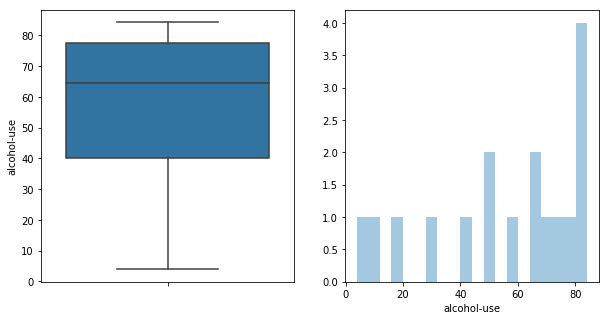

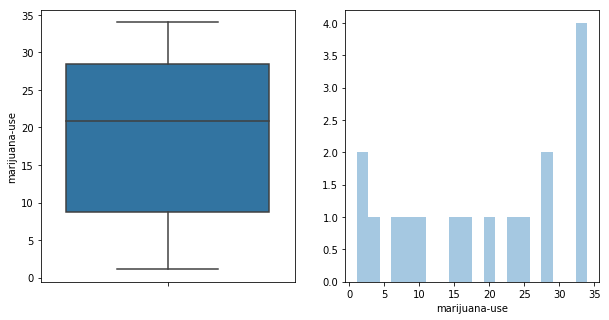

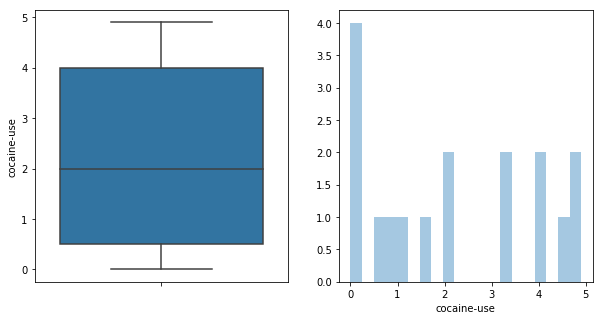

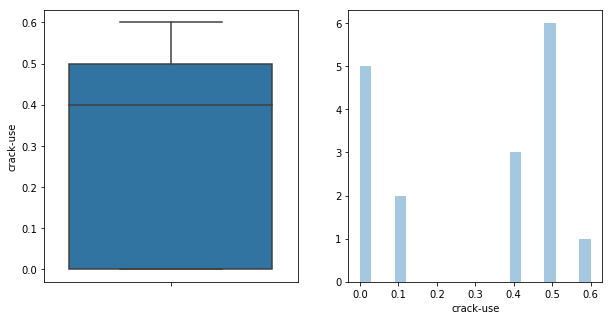

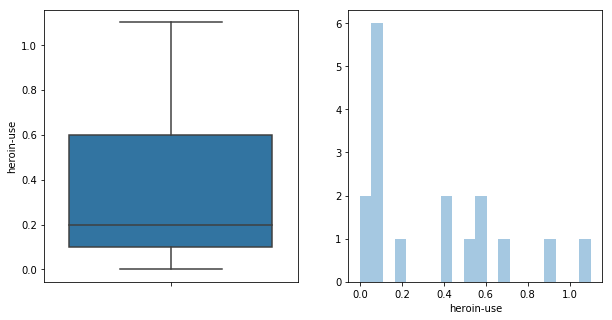

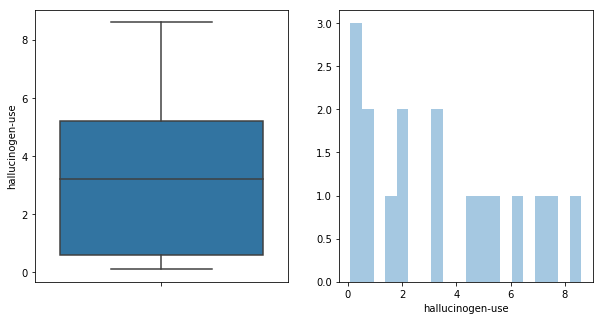

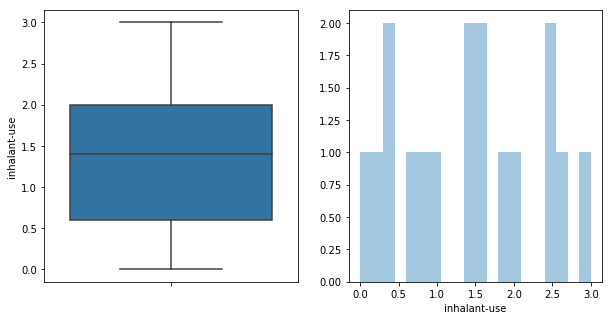

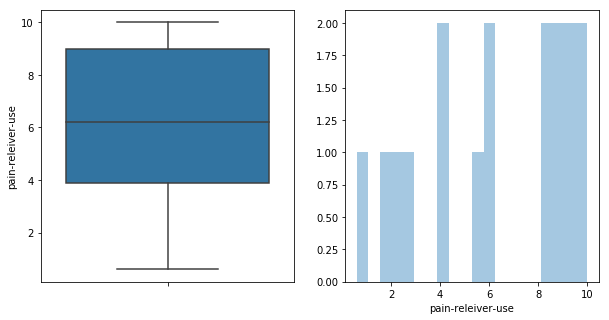

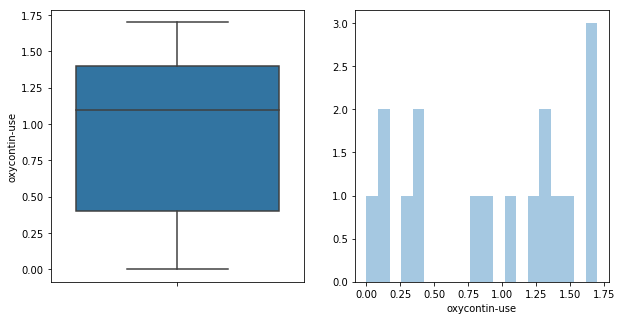

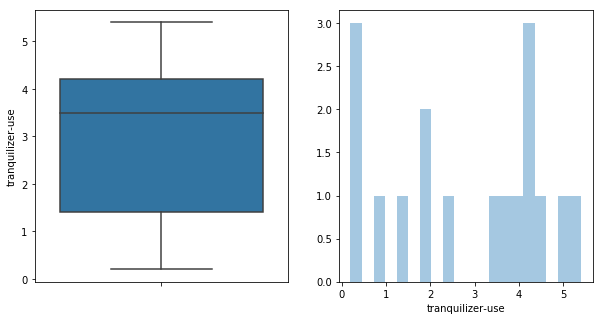

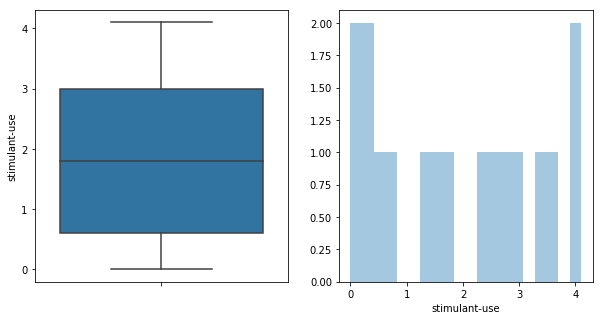

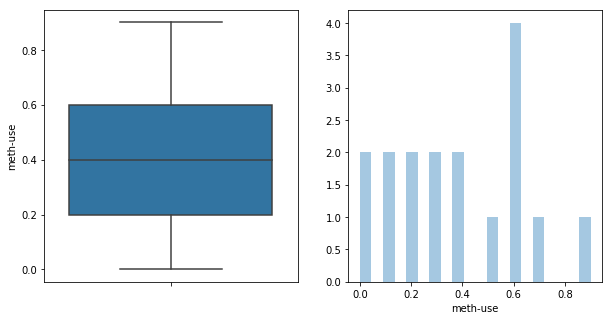

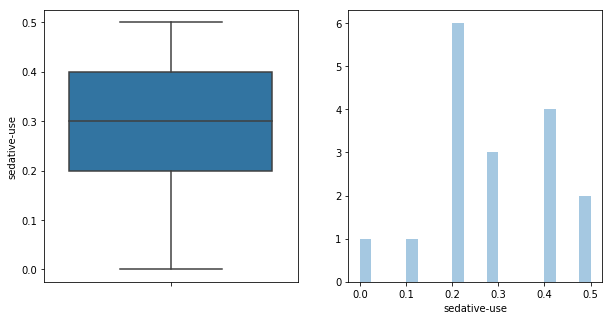

In [118]:
ax = [BoxHistOutliers(col,df_use) for col in df_use]

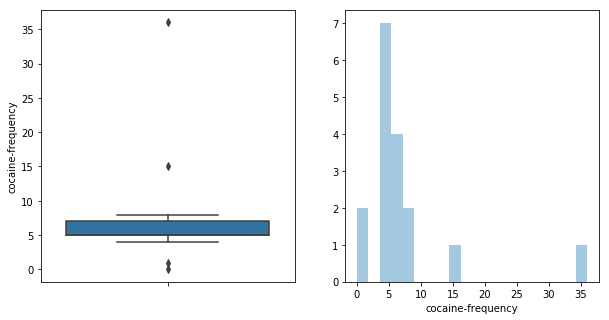


cocaine-frequency Outliers: High


TypeError: '<' not supported between instances of 'str' and 'int'

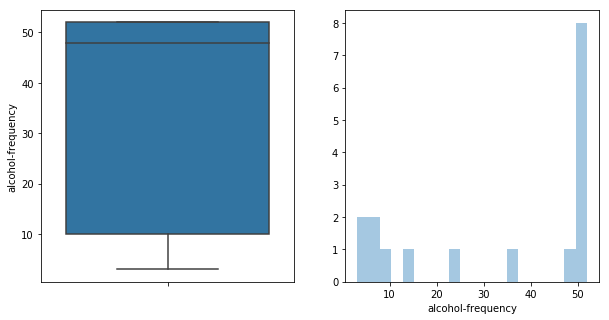

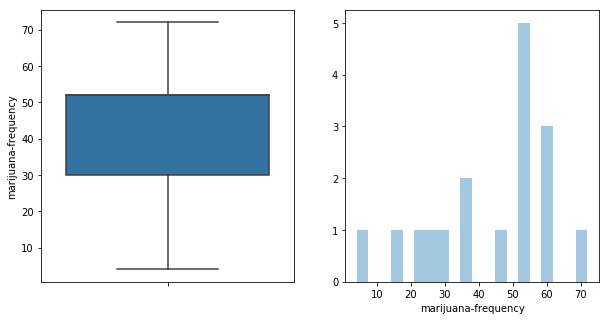

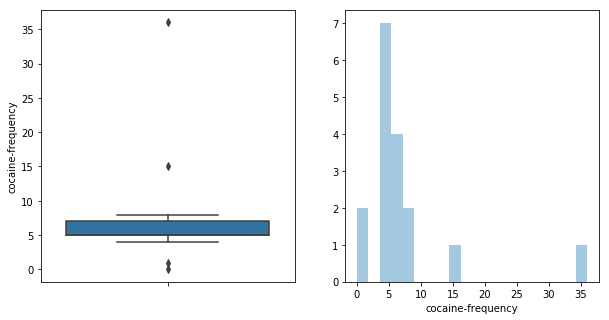


cocaine-frequency Outliers: High


,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,...,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
15,52.0,52.0,36.0,62.0,41.0,44.0,13.5,12.0,5.0,10.0,...,0.4,0.1,0.3,0.2,2.5,0.4,1.4,0.3,0.2,0.2
14,52.0,48.0,15.0,48.0,280.0,3.0,10.0,12.0,12.0,6.0,...,0.5,0.1,0.6,0.3,4.2,0.3,1.9,0.6,0.2,0.3



cocaine-frequency Outliers: Low


,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,...,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
15,52.0,52.0,36.0,62.0,41.0,44.0,13.5,12.0,5.0,10.0,...,0.4,0.1,0.3,0.2,2.5,0.4,1.4,0.3,0.2,0.2
14,52.0,48.0,15.0,48.0,280.0,3.0,10.0,12.0,12.0,6.0,...,0.5,0.1,0.6,0.3,4.2,0.3,1.9,0.6,0.2,0.3


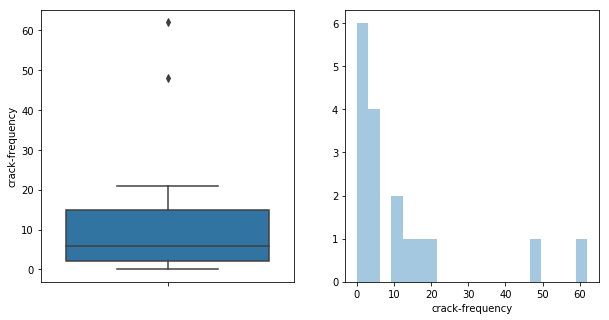


crack-frequency Outliers: High


,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,...,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
15,52.0,52.0,36.0,62.0,41.0,44.0,13.5,12.0,5.0,10.0,...,0.4,0.1,0.3,0.2,2.5,0.4,1.4,0.3,0.2,0.2
14,52.0,48.0,15.0,48.0,280.0,3.0,10.0,12.0,12.0,6.0,...,0.5,0.1,0.6,0.3,4.2,0.3,1.9,0.6,0.2,0.3


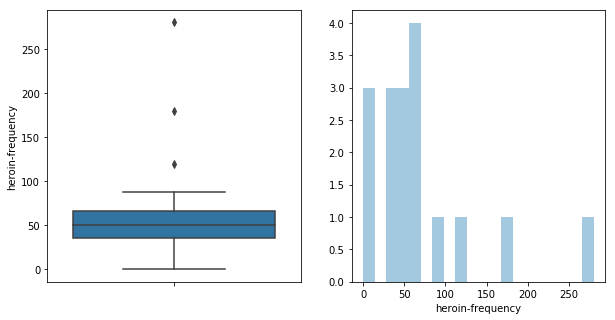


heroin-frequency Outliers: High


,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,...,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
14,52.0,48.0,15.0,48.0,280.0,3.0,10.0,12.0,12.0,6.0,...,0.5,0.1,0.6,0.3,4.2,0.3,1.9,0.6,0.2,0.3
7,36.0,60.0,5.5,2.0,180.0,3.0,3.0,12.0,7.5,4.5,...,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
16,52.0,36.0,0.0,0.0,120.0,2.0,0.0,24.0,0.0,5.0,...,0.0,0.0,0.1,0.0,0.6,0.0,0.2,0.0,0.0,0.0


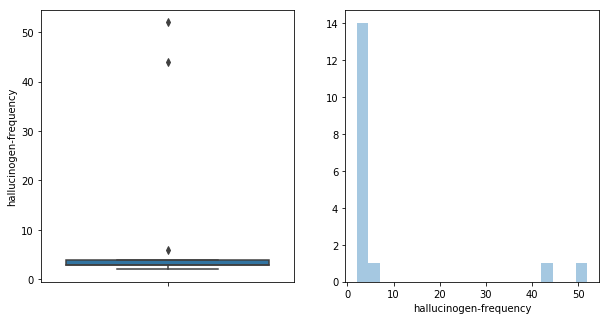


hallucinogen-frequency Outliers: High


,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,...,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,...,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
15,52.0,52.0,36.0,62.0,41.0,44.0,13.5,12.0,5.0,10.0,...,0.4,0.1,0.3,0.2,2.5,0.4,1.4,0.3,0.2,0.2
1,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,...,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1


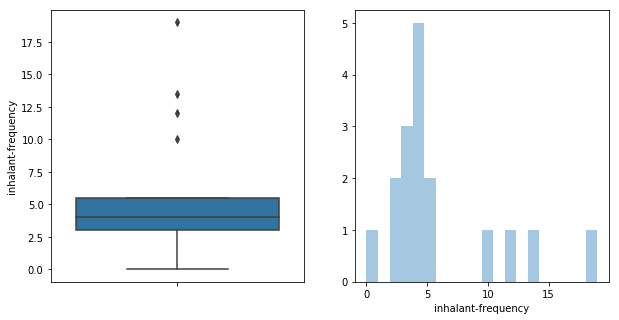


inhalant-frequency Outliers: High


,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,...,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,...,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
15,52.0,52.0,36.0,62.0,41.0,44.0,13.5,12.0,5.0,10.0,...,0.4,0.1,0.3,0.2,2.5,0.4,1.4,0.3,0.2,0.2
1,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,...,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
14,52.0,48.0,15.0,48.0,280.0,3.0,10.0,12.0,12.0,6.0,...,0.5,0.1,0.6,0.3,4.2,0.3,1.9,0.6,0.2,0.3


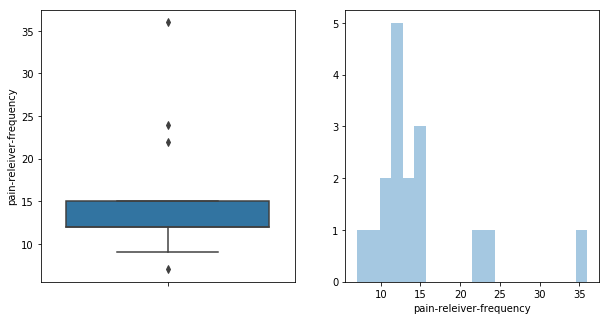


pain-releiver-frequency Outliers: High


,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,...,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,...,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
16,52.0,36.0,0.0,0.0,120.0,2.0,0.0,24.0,0.0,5.0,...,0.0,0.0,0.1,0.0,0.6,0.0,0.2,0.0,0.0,0.0
13,52.0,72.0,8.0,15.0,66.0,2.0,3.5,22.0,46.0,8.0,...,0.5,0.4,1.8,0.4,5.9,0.9,3.6,1.4,0.4,0.4



pain-releiver-frequency Outliers: Low


,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,...,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,...,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2


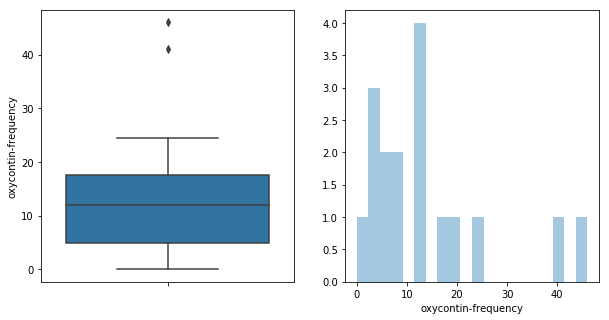


oxycontin-frequency Outliers: High


,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,...,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
13,52.0,72.0,8.0,15.0,66.0,2.0,3.5,22.0,46.0,8.0,...,0.5,0.4,1.8,0.4,5.9,0.9,3.6,1.4,0.4,0.4
1,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,...,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1


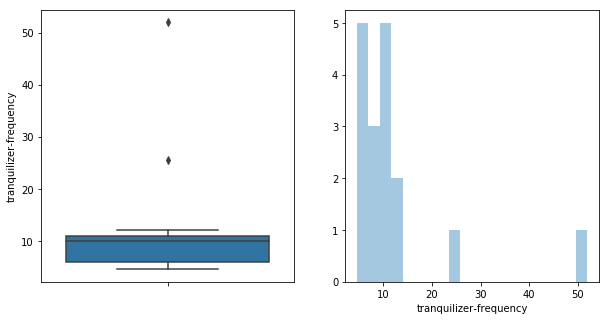


tranquilizer-frequency Outliers: High


,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,...,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,...,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,...,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1


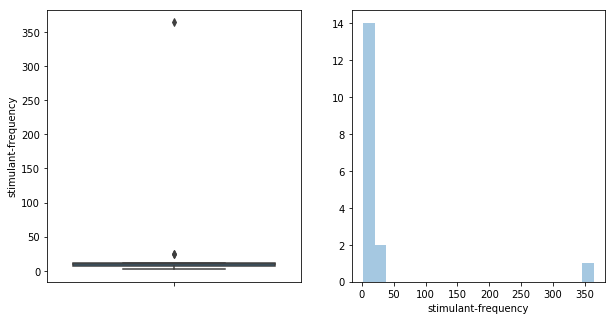


stimulant-frequency Outliers: High


,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,...,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
16,52.0,36.0,0.0,0.0,120.0,2.0,0.0,24.0,0.0,5.0,...,0.0,0.0,0.1,0.0,0.6,0.0,0.2,0.0,0.0,0.0
15,52.0,52.0,36.0,62.0,41.0,44.0,13.5,12.0,5.0,10.0,...,0.4,0.1,0.3,0.2,2.5,0.4,1.4,0.3,0.2,0.2
14,52.0,48.0,15.0,48.0,280.0,3.0,10.0,12.0,12.0,6.0,...,0.5,0.1,0.6,0.3,4.2,0.3,1.9,0.6,0.2,0.3


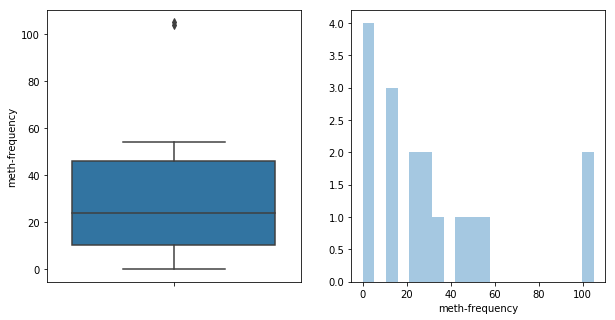


meth-frequency Outliers: High


,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,...,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
7,36.0,60.0,5.5,2.0,180.0,3.0,3.0,12.0,7.5,4.5,...,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
14,52.0,48.0,15.0,48.0,280.0,3.0,10.0,12.0,12.0,6.0,...,0.5,0.1,0.6,0.3,4.2,0.3,1.9,0.6,0.2,0.3


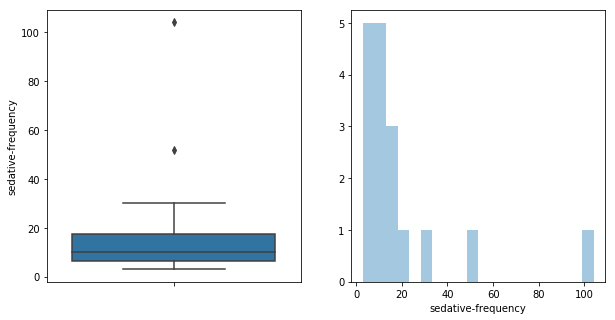


sedative-frequency Outliers: High


,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,...,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
15,52.0,52.0,36.0,62.0,41.0,44.0,13.5,12.0,5.0,10.0,...,0.4,0.1,0.3,0.2,2.5,0.4,1.4,0.3,0.2,0.2
10,52.0,52.0,5.0,5.0,57.5,3.0,4.0,15.0,17.5,12.0,...,0.5,1.1,5.2,1.0,10.0,1.7,4.4,3.6,0.6,0.2


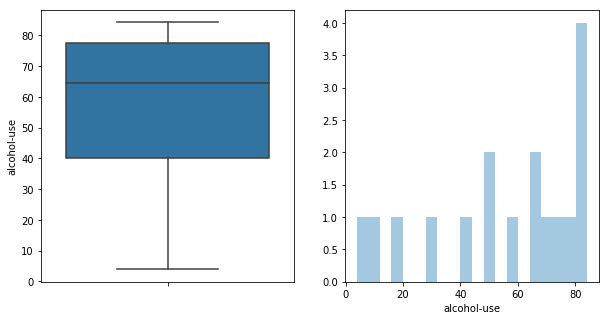

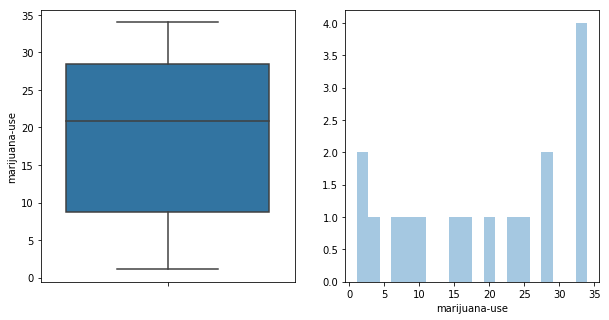

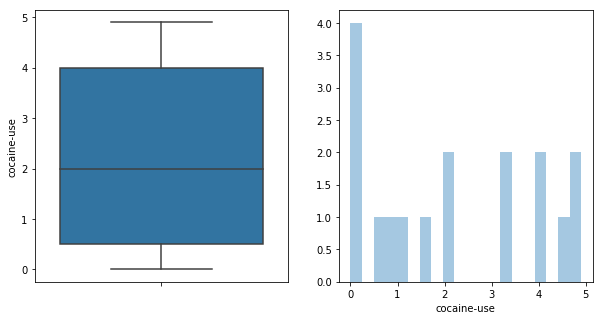

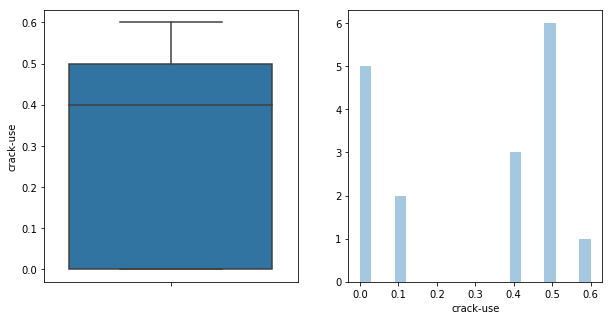

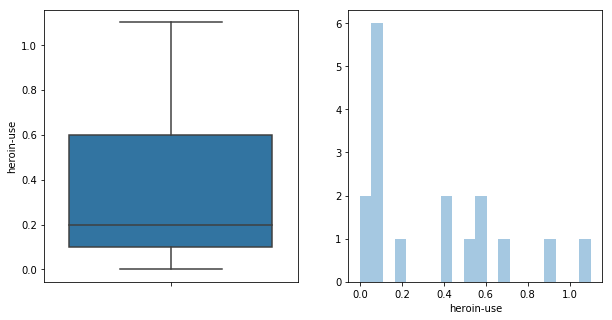

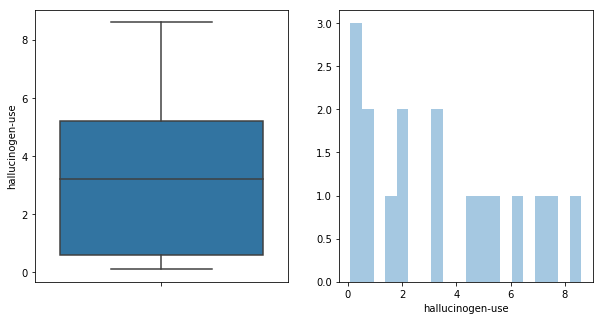

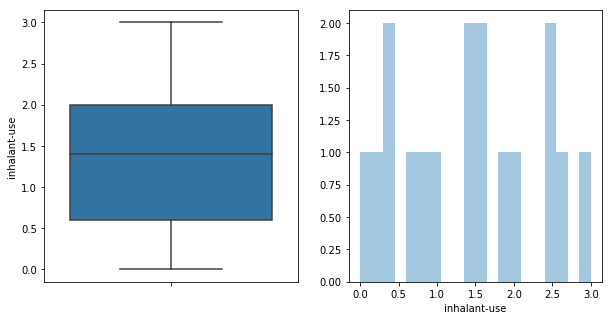

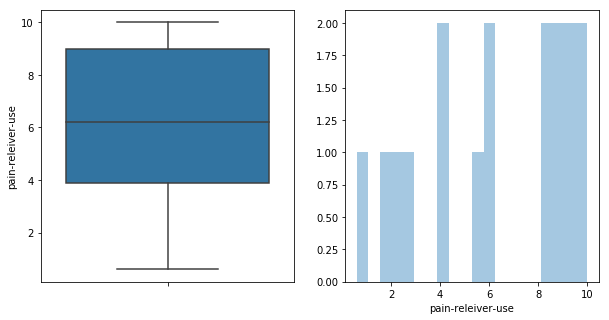

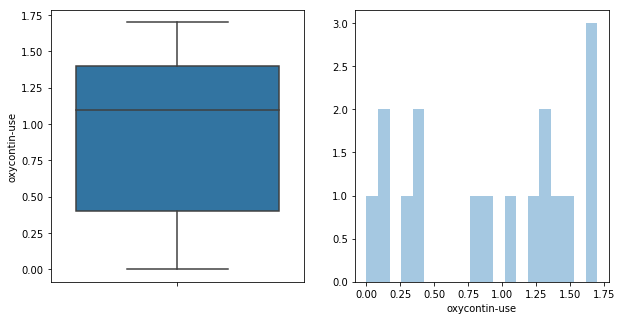

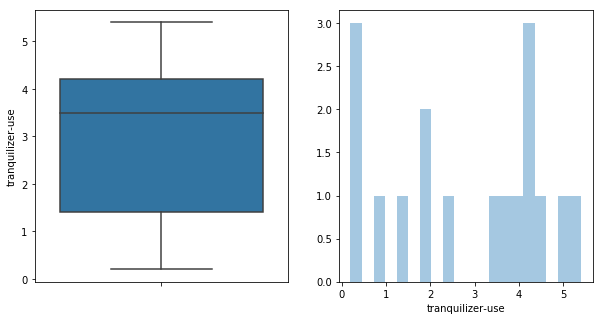

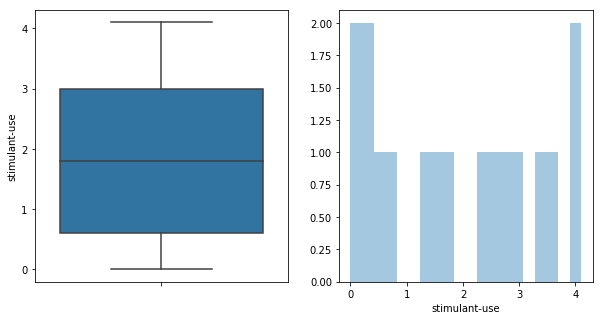

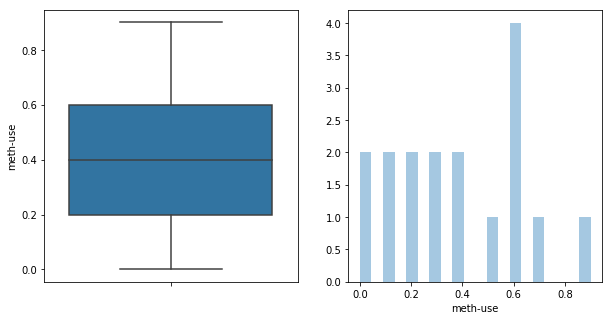

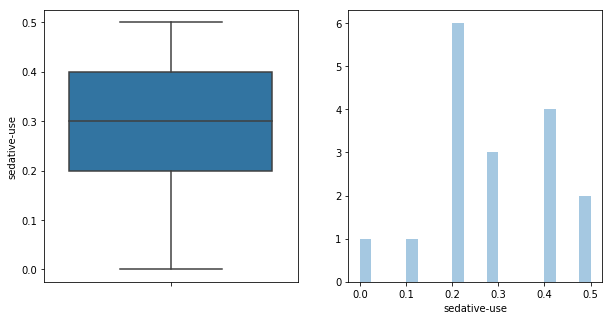

In [119]:
#ax = [BoxHistOutliers(col) for col in df_freq]
ax = [BoxHistOutliers(col,df_freq) for col in df_freq]

In [ ]:
# ?? How can these be displayed without scrolling?

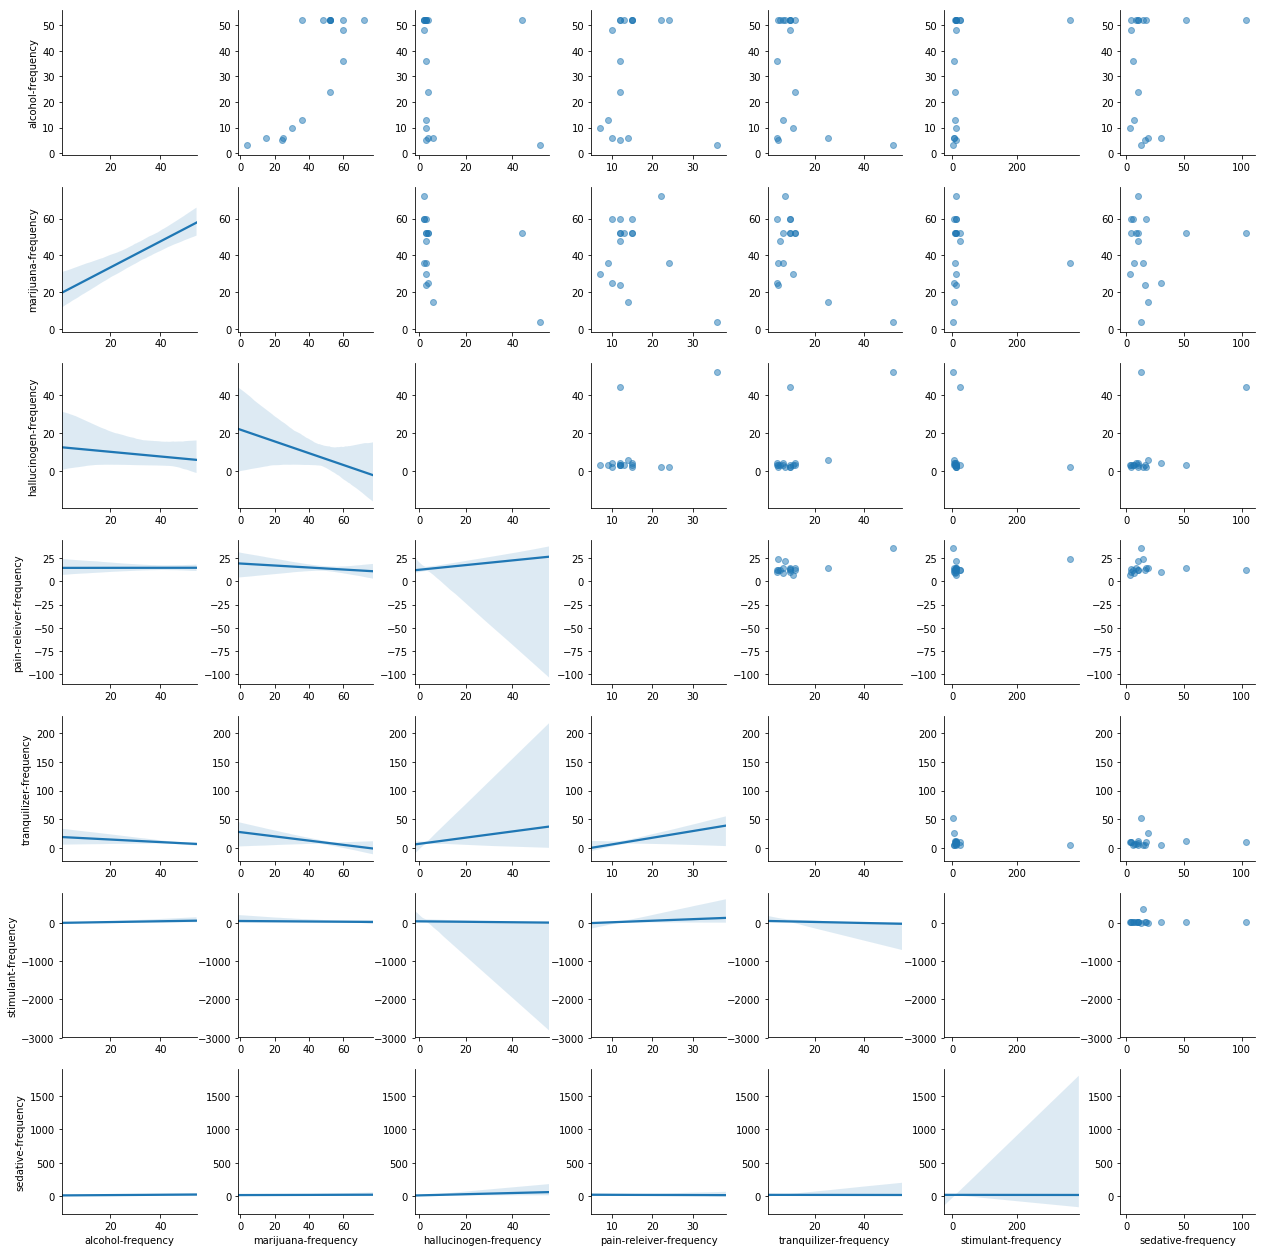

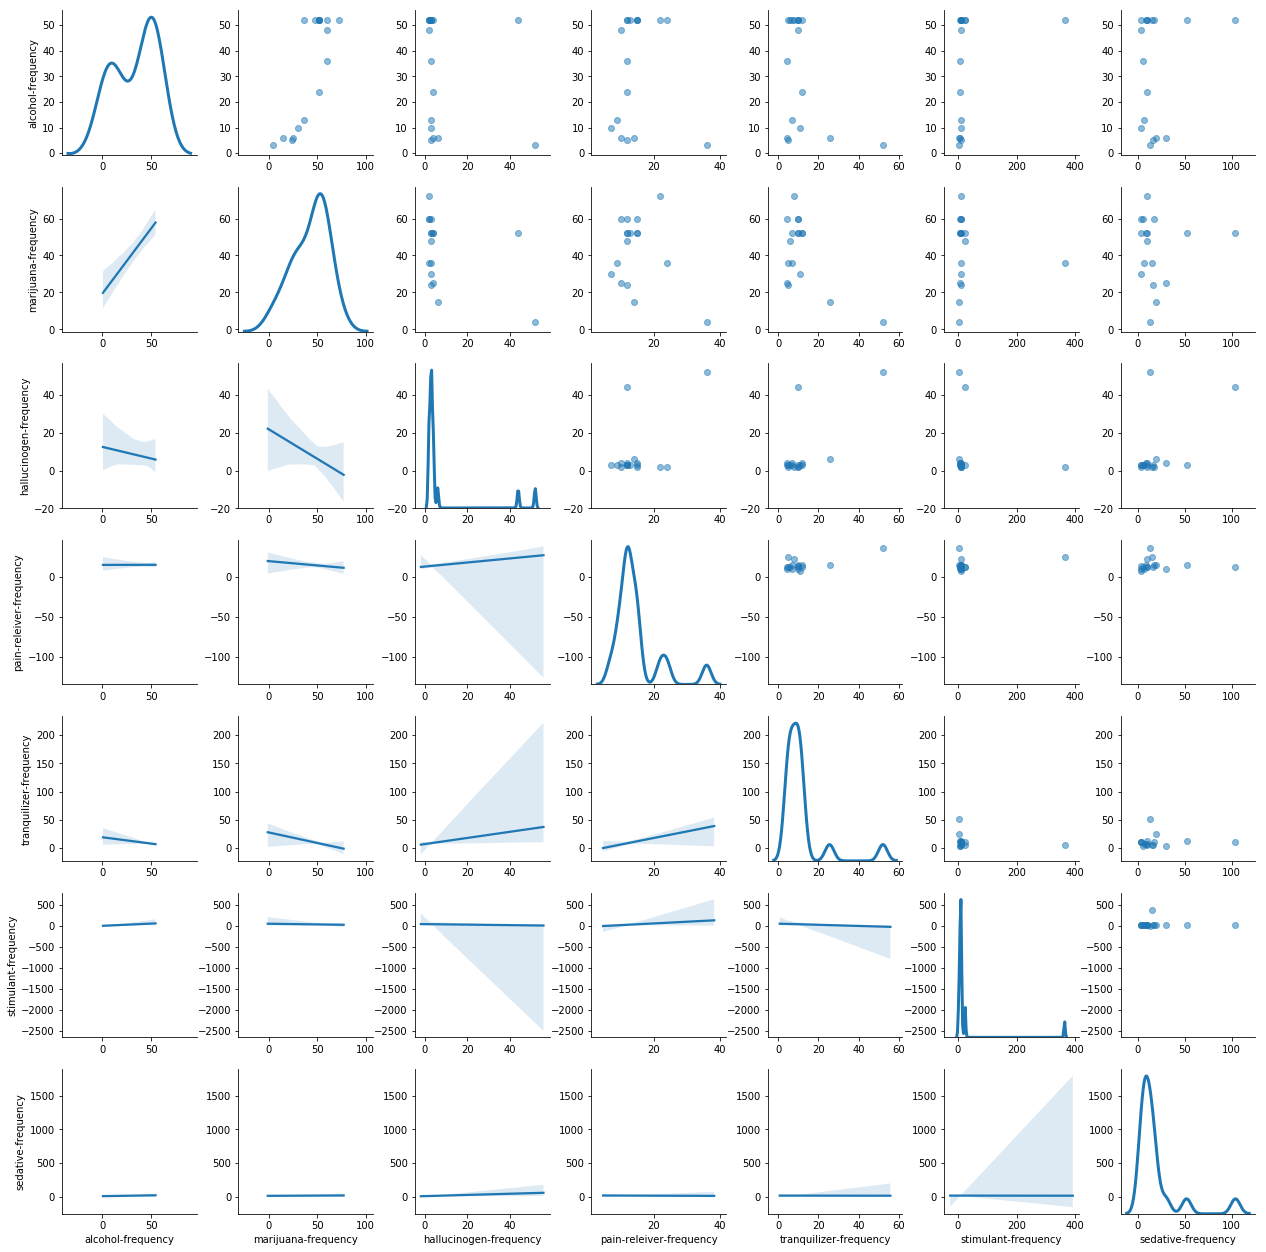

In [298]:
# ?? Why doest it show that first graph?

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_freq.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

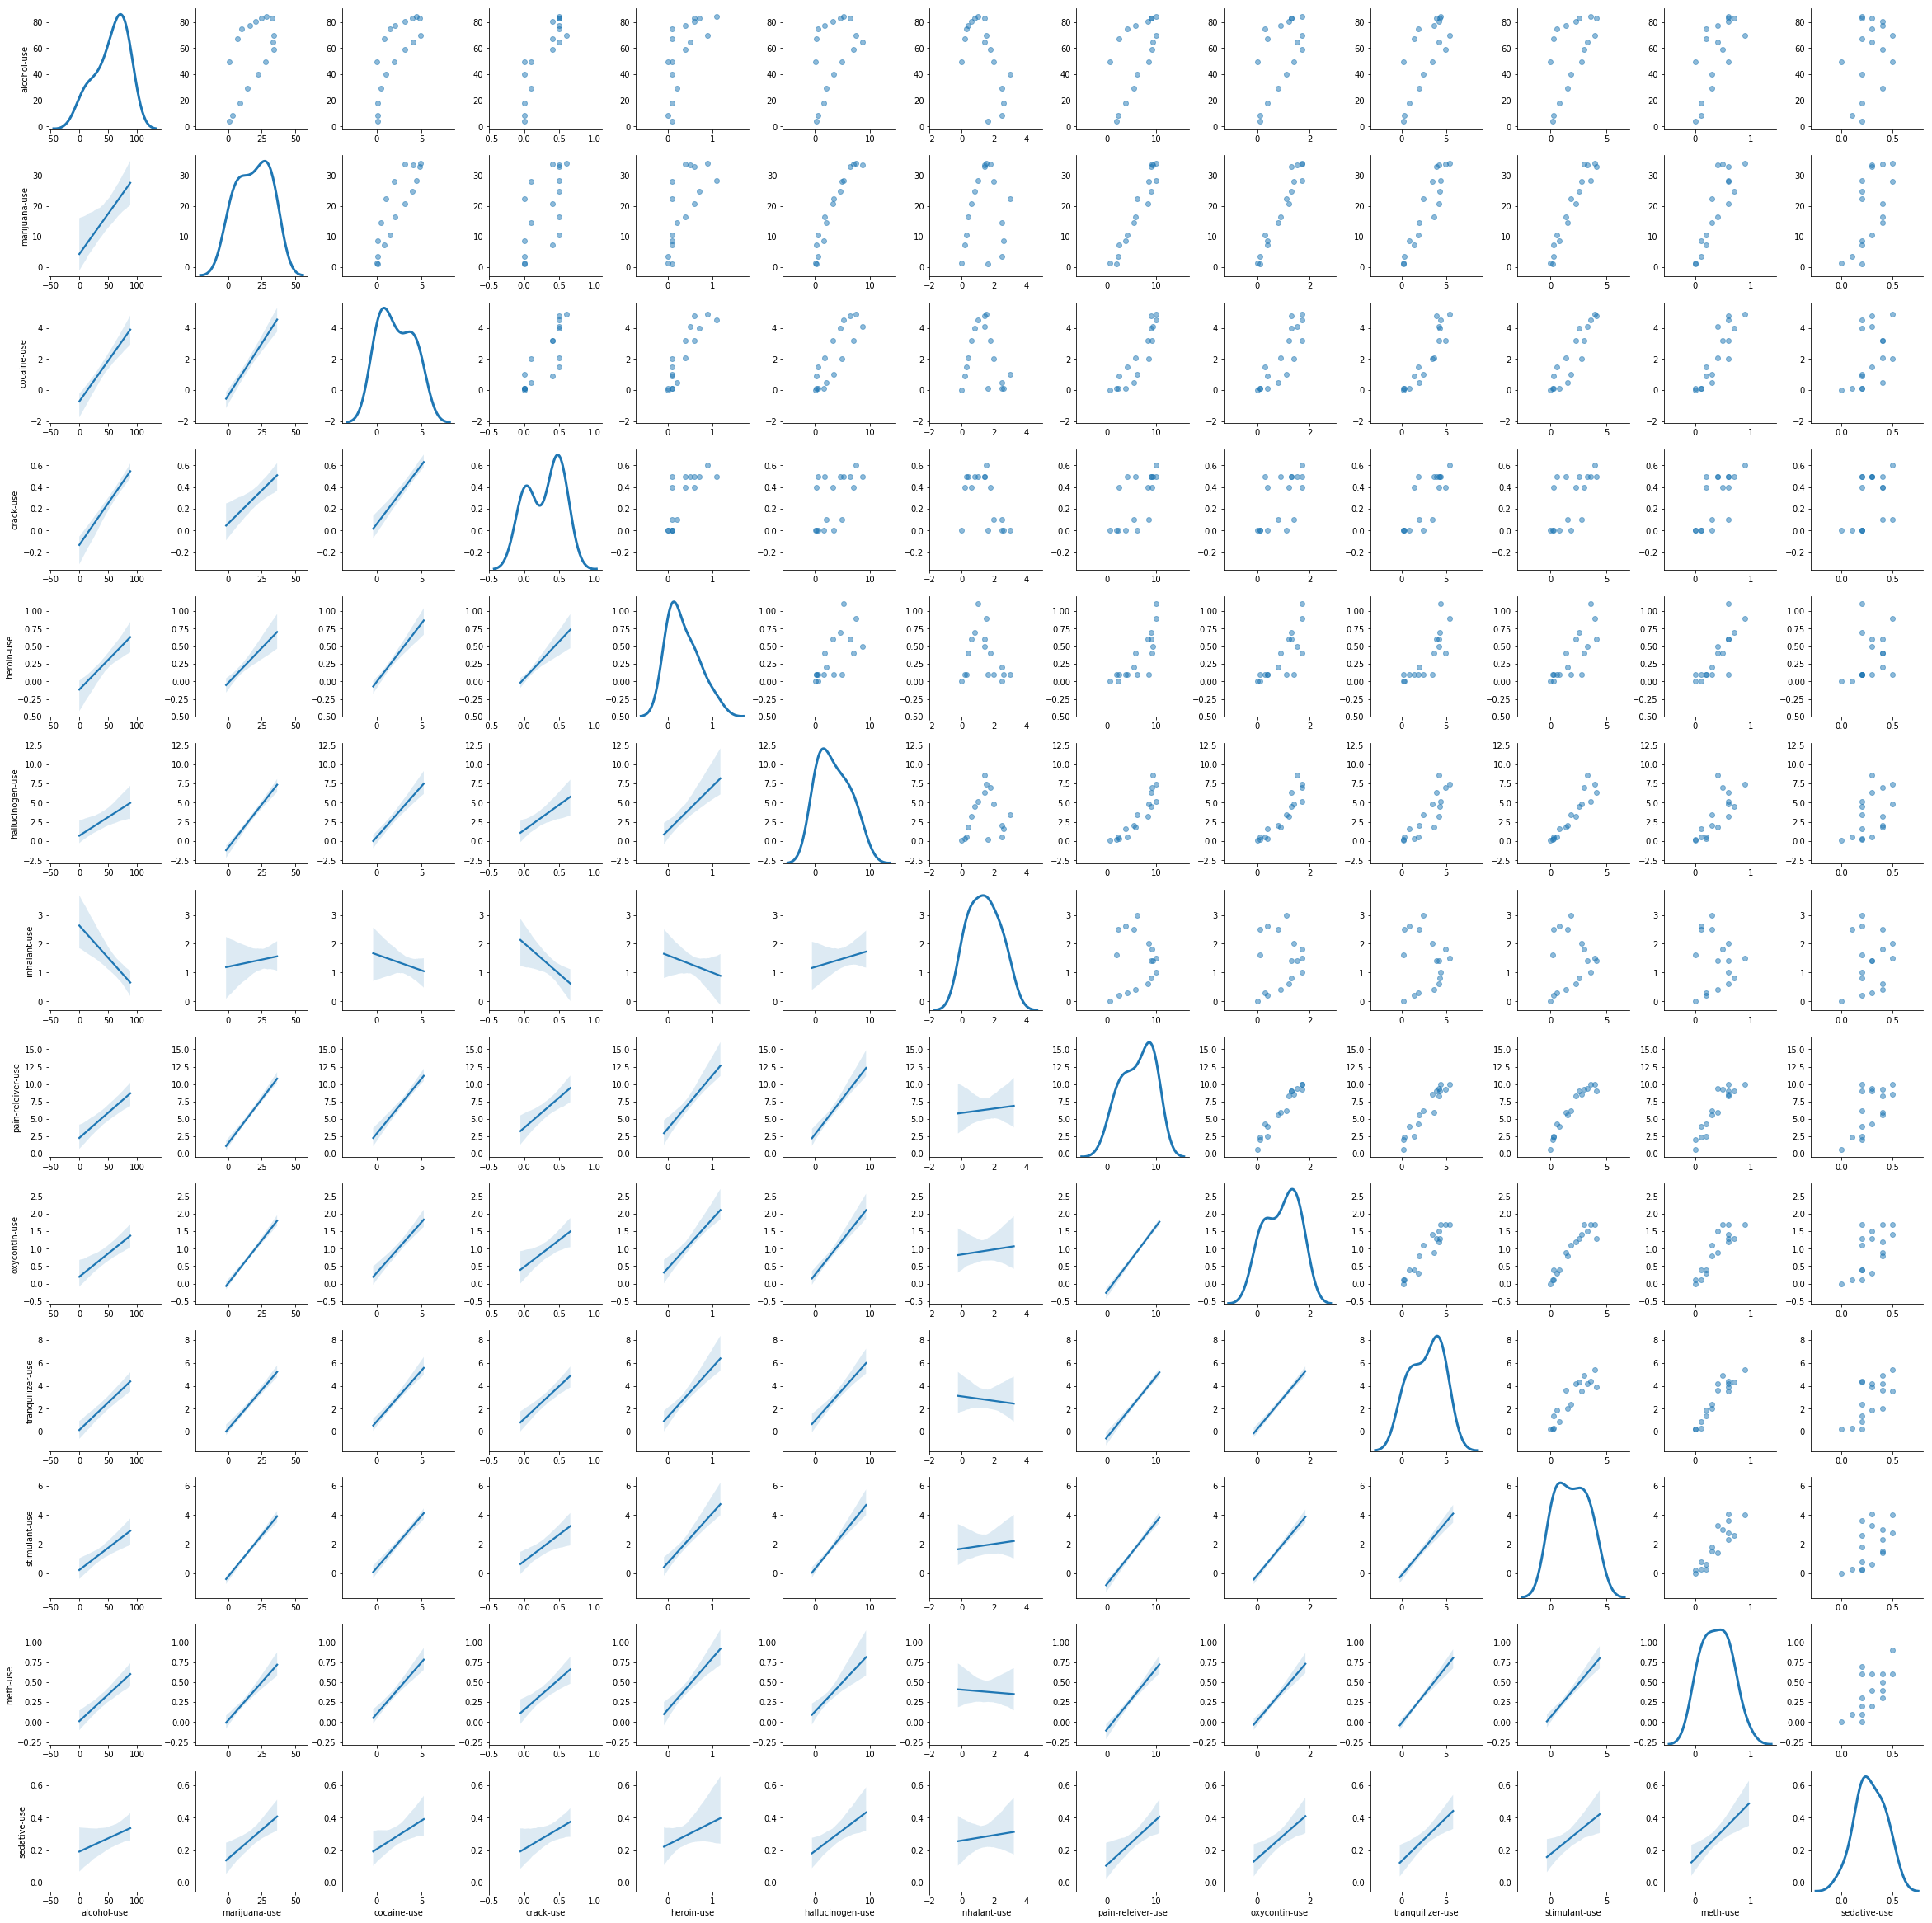

In [43]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_use.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [238]:
corrmat = df_freq.corr()

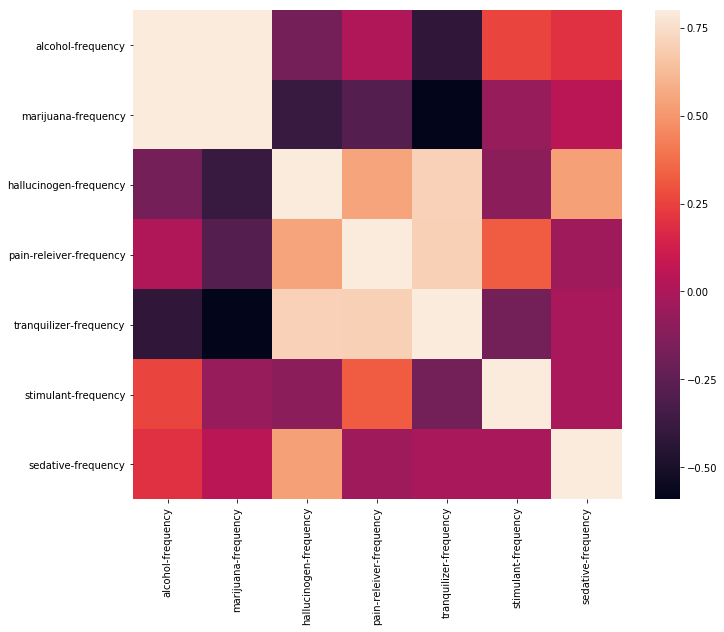

In [239]:
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [237]:
corrmat = df_use.corr()

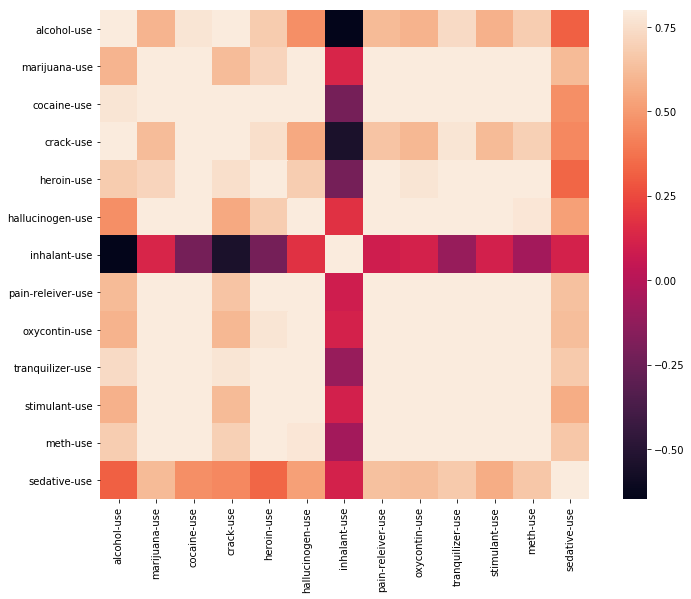

In [12]:
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [242]:
features = pd.get_dummies(df['age'])

In [300]:
features  #?? this feature seems extreme for age... should these just be numbered 0-16?

,12,13,14,15,16,17,18,19,20,21,...,26-29,30-34,35-49,50-64,65+,Minor,AdultBelowDrinking,Adult,Heavy Drinker,Heavy Marijuana
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1


In [270]:
features['Minor'] = np.where(df['age']<'18', 1, 0)

In [269]:
features['Adult Below Drinking Age'] = np.where((df['age']>='18') & (df['age']<'21'), 1, 0)

In [273]:
features['Adult'] = np.where(df['age']>'21', 1, 0)

In [293]:
avgAlcoholUse = df['alcohol-use'].mean()
avgAlcoholFreq = df['alcohol-frequency'].mean()
features['High Use and Freq Alcohol'] = np.where((df['alcohol-use'] > avgAlcoholUse) & (df['alcohol-frequency'] > avgAlcoholFreq),1, 0)

In [306]:
avgMarijuanaUse = df['marijuana-use'].mean()
avgMarijuanaFreq = df['marijuana-frequency'].mean()
features['High Use and Freq Marijuana'] = np.where((df['marijuana-use'] > avgMarijuanaUse) & (df['marijuana-frequency'] > avgMarijuanaFreq),1, 0)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
11,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0


In [ ]:
# feature selection??? 

# ?? isn't this for predictive models?
# ?? do predictive models require data over time?
# ?? do I need to divide up the data into a test set and training set?
# 
 